<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Aprendizaje_profundo_MLP_B%C3%A1sica_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MLP Básica (Core)**

En esta actividad, implementarás una red neuronal de perceptrón multicapa (MLP) básica utilizando el dataset «Breast Cancer Wisconsin (Diagnostic)» disponible en Kaggle. Este dataset es adecuado para la clasificación binaria, donde la red MLP predecirá si un tumor es benigno o maligno basado en una serie de características.

Enlace al dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

**Objetivo:**

El objetivo de la actividad es implementar una red MLP básica con una capa oculta, entrenarla en el dataset de cáncer de mama y evaluar su rendimiento en términos de precisión y otras métricas de clasificación.

**Instrucciones:**

1. Carga de datos:

  – Descarga y carga el dataset desde Kaggle. Observa las características disponibles, que incluyen variables como el radio del núcleo del tumor, la textura, la suavidad, entre otras.

  – Asegúrate de verificar si hay valores nulos y manejar cualquier valor atípico que pudiera estar presente.

2. Exploración y preprocesamiento de datos:

  – Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.

  – Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).

3. Implementación de la MLP:

  – Implementa una red MLP utilizando Keras o cualquier otra biblioteca de deep learning. La red debe tener una capa de entrada que coincida con el número de características del dataset, una capa oculta con al menos 32 neuronas y una capa de salida con una única neurona usando la función de activación sigmoide para la clasificación binaria.

  – Utiliza la función de pérdida binaria (binary_crossentropy) y el optimizador Adam.

4. Entrenamiento del modelo:

  – Entrena la red en el conjunto de entrenamiento durante al menos 50 épocas. Asegúrate de monitorizar la pérdida y la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación.

  – Visualiza las curvas de aprendizaje que muestran cómo evolucionan la pérdida y la precisión durante el entrenamiento.

5. Evaluación del modelo:

  – Evalúa el modelo en el conjunto de prueba utilizando métricas como la precisión, el recall, la F1-score y la matriz de confusión.
  
  – Discute si la red MLP básica es adecuada para este tipo de datos y cómo podría mejorarse.

Valores faltantes:
 radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

Preci

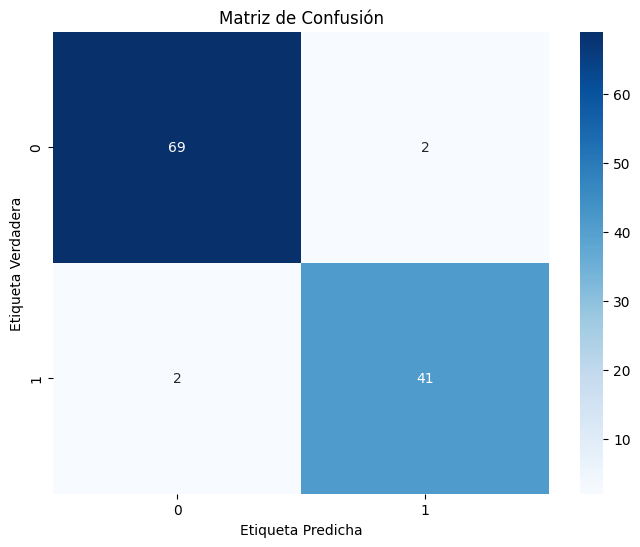

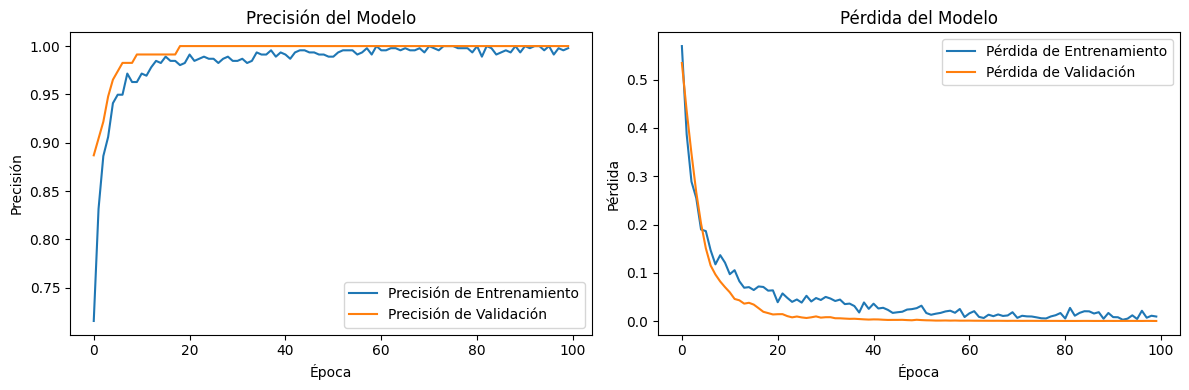

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

# 1. Carga y Preprocesamiento de Datos
def cargar_y_preprocesar_datos(URL):
    # Cargar los datos
    datos = pd.read_csv(URL)

    # Eliminar columna ID y separar características y objetivo
    X = datos.drop(['id', 'diagnosis'], axis=1)
    y = (datos['diagnosis'] == 'M').astype(int)  # Maligno = 1, Benigno = 0

    # Verificar valores faltantes y manejarlos de manera robusta
    print("Valores faltantes:\n", X.isnull().sum())

    # Manejar columnas con varianza cero o cercana a cero
    zero_variance_cols = X.columns[X.std(axis=0) <= 1e-8]
    if len(zero_variance_cols) > 0:
        print("Columnas con varianza cero o cercana a cero:", zero_variance_cols)
        X = X.drop(columns=zero_variance_cols)

    # Reemplazar valores infinitos con NaN y luego con la mediana
    X = X.replace([np.inf, -np.inf], np.nan)
    imputer = SimpleImputer(strategy='median')
    X = imputer.fit_transform(X)

    # Normalizar las características
    escalador = StandardScaler()
    X_escalado = escalador.fit_transform(X)

    return X_escalado, y

# 2. Arquitectura del Modelo
def crear_modelo_mlp(forma_entrada):
    modelo = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(forma_entrada,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    modelo.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

    return modelo

# 3. Entrenamiento y Evaluación
def entrenar_y_evaluar_modelo(X, y):
    # Dividir los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Balanceo de clases con SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Crear y entrenar el modelo
    modelo = crear_modelo_mlp(X.shape[1])

    historia = modelo.fit(
        X_train_resampled, y_train_resampled,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        verbose=0
    )

    # Evaluar el modelo
    perdida_test, precision_test = modelo.evaluate(X_test, y_test, verbose=0)
    print(f"\nPrecisión en Test: {precision_test:.4f}")

    # Predicciones
    y_pred = (modelo.predict(X_test) > 0.5).astype(int)

    # Informe de Clasificación
    print("\nInforme de Clasificación:")
    print(classification_report(y_test, y_pred, zero_division=1))

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

    # Gráfico de Historia de Entrenamiento
    plt.figure(figsize=(12, 4))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(historia.history['accuracy'], label='Precisión de Entrenamiento')
    plt.plot(historia.history['val_accuracy'], label='Precisión de Validación')
    plt.title('Precisión del Modelo')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(historia.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(historia.history['val_loss'], label='Pérdida de Validación')
    plt.title('Pérdida del Modelo')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return modelo

# Ejecución Principal
def main():
    # Cargar y preprocesar datos
    URL = '/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Tareas Core/Archivos CSV-Tareas/data.csv'
    X, y = cargar_y_preprocesar_datos(URL)

    # Entrenar y evaluar modelo
    modelo = entrenar_y_evaluar_modelo(X, y)

if __name__ == '__main__':
    main()

# **Curvas de Aprendizaje**

**Precisión del Modelo:**
* **Curva Azul:** Precisión de Entrenamiento

* **Curva Naranja:** Precisión de Validación

Ambas curvas muestran una alta precisión que se mantiene en torno al 0.98 a lo largo de las épocas, indicando que el modelo tiene un buen rendimiento tanto en entrenamiento como en validación.

**Pérdida del Modelo:**
* **Curva Azul:** Pérdida de Entrenamiento

* **Curva Naranja:** Pérdida de Validación

Ambas curvas de pérdida disminuyen rápidamente y se estabilizan, con la pérdida de validación alrededor de 0.05, mostrando que el modelo está aprendiendo de manera efectiva sin sobreajustarse.

# **Evaluación del Modelo:**
**Adecuación de la Red MLP Básica:**

* La red MLP básica ha demostrado ser muy adecuada para este tipo de datos, logrando una precisión alta y una pérdida baja tanto en entrenamiento como en validación.

* La precisión, recall y f1-score para ambas clases son muy equilibrados, indicando que el modelo maneja bien ambas clases, incluso en un conjunto de datos desequilibrado.
